<a href="https://colab.research.google.com/github/nastenkass/homeworkMachineLearning/blob/main/Sem03_KNN_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/sem3/mglearn')

!pip install mglearn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.9 MB/s eta 0:00:00


## Машинное обучение с учителем

Обучение с учителем используется всякий раз, когда мы хотим предсказать определенный результат (ответ) по данному объекту, и у нас есть пары объект-ответ. Мы строим модель машинного обучения на основе этих пар объект-ответ, которые составляют наш обучающий набор данных. Наша цель состоит в том, чтобы получить точные прогнозы для новых, никогда ранее не встречавшихся данных

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn

### Классификация (classification) и регрессия (regression)

Цель *классификации* состоит в том, чтобы спрогнозировать метку класса (class label), которая представляет собой выбор из заранее определенного списка возможных вариантов.

Цель *регрессии* состоит в том, чтобы спрогнозировать непрерывное число или число с плавающей точкой (floating- point number).

Форма массива X: (26, 2)


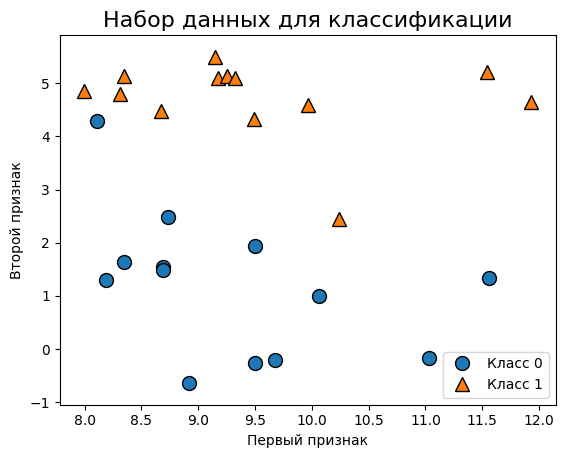

In [6]:
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Класс 0', 'Класс 1'], loc=4)
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.title('Набор данных для классификации', fontsize=16)
print(f'Форма массива X: {X.shape}')
plt.show()

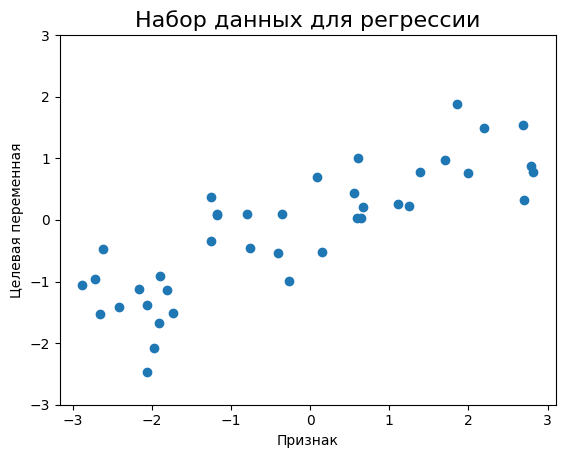

In [7]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")
plt.title('Набор данных для регрессии', fontsize=16)
plt.show()

### Обобщающая способность, переобучение и недообучение

В машинном обучении с учителем нам нужно построить модель на обучающих данных, а затем получить точные прогнозы для новых, еще не встречавшихся нам данных, которые имеют те же самые характеристики, что и использованный нами обучающий набор. Если модель может выдавать точные прогнозы на ранее не встречавшихся данных, мы говорим, что модель обладает способностью *обобщать* (*generalize*) результат на тестовые данные. Нам необходимо построить модель, которая будет обладать максимальной обобщающей способностью.

Построение модели, которая слишком сложна для имеющегося у нас объема информации, называется *переобучением* (*overfitting*). Переобучение происходит, когда ваша модель слишком точно подстраивается под особенности обучающего набора и вы получаете модель, которая хорошо работает на обучающем наборе, но не умеет обобщать результат на новые данные.

С другой стороны, если ваша модель слишком проста, вы, возможно, не смогли охватить все многообразие и изменчивость данных, и ваша модель будет плохо работать даже на обучающем наборе. Выбор слишком простой модели называется *недообучением* (*underfitting*).

Чем сложнее модель, тем лучше она будет работать на обучающих данных. Однако, если наша модель становится слишком сложной, мы начинаем уделять слишком много внимания каждой отдельной точке данных в нашем обучающем наборе, и эта модель не будет хорошо обобщать результат на новые данные.

<img src="https://it.kgsu.ru/ML_Begin/images/ris27_1.jpg" alt="Overfitting / Underfitting" width="700">
<br><br>

**Note**: Чем больше данных, тем более сложную модель можно использовать, не беспокоясь о переобучении


## KNN

Построение модели заключается в запоминании обучающего набора данных. Для того, чтобы сделать прогноз для новой точки данных, алгоритм находит ближайшие к ней точки обучающего набора, то есть находит «*ближайших соседей*».

### KNN для классификации

В простейшем варианте алгоритм *k ближайших соседей* рассматривает лишь одного ближайшего соседа – точку обучающего набора, ближе всего расположенную к точке, для которой мы хотим получить прогноз

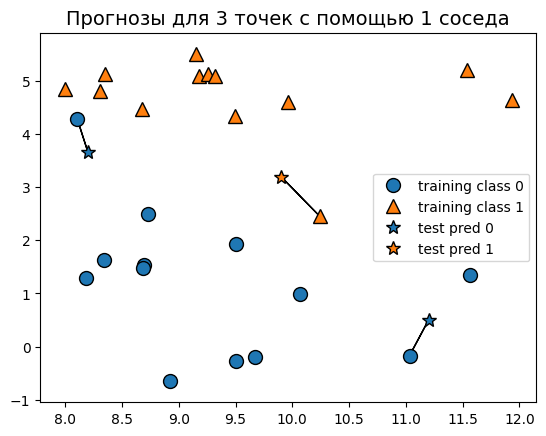

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.title('Прогнозы для 3 точек с помощью 1 соседа', fontsize=14)
plt.show()

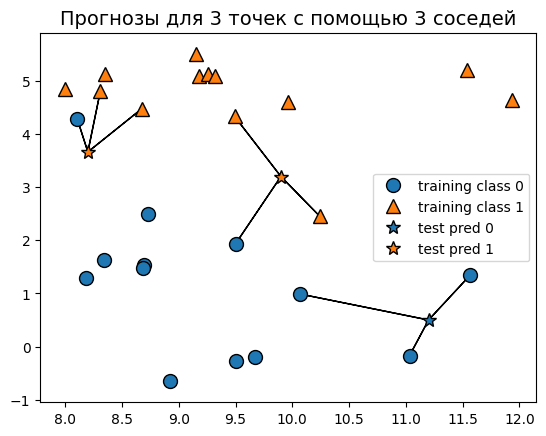

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.title('Прогнозы для 3 точек с помощью 3 соседей', fontsize=14)
plt.show()

#### KNN для классификации с помощью `scikit-learn`

Как можно применить алгоритм *k ближайших соседей*, используя `scikit-learn`:
1. Разделим наши данные на обучающий и тестовый наборы.
2. Создадим объект-экземпляр класса, задавая параметры, например, количество соседей.
3. Затем подгоняем классификатор, используя обучающий набор.
4. Чтобы получить прогнозы для тестовых данных, мы вызываем метод `predict`.
5. Для оценки обобщающей способности модели мы вызываем метод `score` с тестовыми данными и тестовыми метками.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

print(f'Прогнозы на тестовом наборе: {clf.predict(X_test)}')
print(f'Правильность на тестовом наборе: {clf.score(X_test, y_test):.2f}')

Прогнозы на тестовом наборе: [1 0 1 0 1 0 0]
Правильность на тестовом наборе: 0.86


#### Анализ KNeighborsClassifier

Для двумерных массивов данных мы можем показать прогнозы для всех возможных точек тестового набора, разместив их в плоскости *ху*. Мы зададим цвет плоскости в соответствии с тем классом, который будет присвоен точке в этой области. Это позволит нам сформировать *границу принятия решений* (*decision boundary*), которая разбивает плоскость на две области: область, где алгоритм присваивает класс 0, и область, где алгоритм присваивает класс 1.

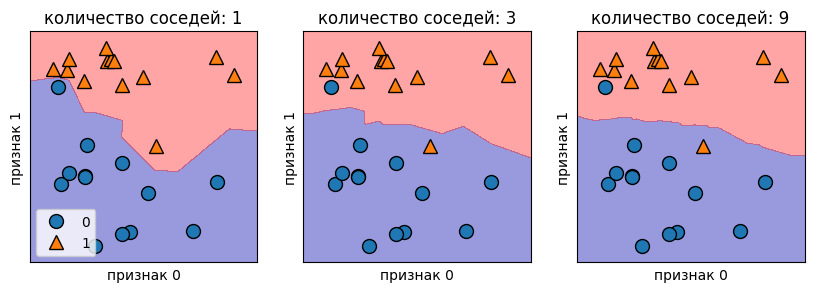

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f'количество соседей: {n_neighbors}')
    ax.set_xlabel('признак 0')
    ax.set_ylabel('признак 1')
axes[0].legend(loc=3)
plt.show()

#### Brest cancer dataset

Давайте выясним, существует ли взаимосвязь между сложностью модели и обобщающей способностью, о которой мы говорили ранее. Мы сделаем это с помощью реального набора данных *Breast Cancer*.

In [12]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(f'Ключи cancer:\n{cancer.keys()}\n')
print(f'Форма массива data для набора cancer: {cancer.data.shape}\n')

examples = {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
print(f"Количество примеров для каждого класса:\n{examples}\n")
print(f'Имена признаков:\n{cancer["feature_names"]}\n')

Ключи cancer:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Форма массива data для набора cancer: (569, 30)

Количество примеров для каждого класса:
{'malignant': 212, 'benign': 357}

Имена признаков:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']



Оценим качество работы модели на обучающем и тестовом наборах с использованием разного количества соседей

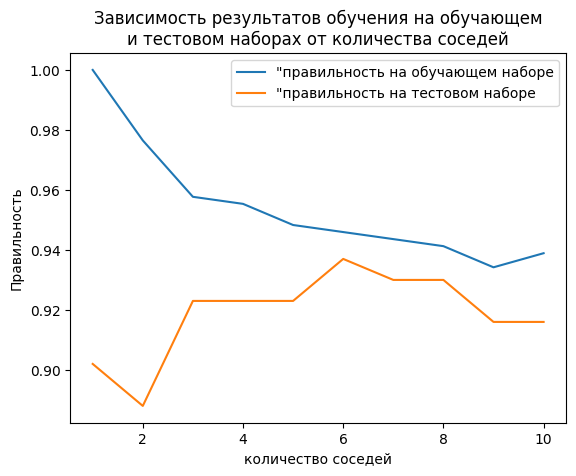

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer["data"],
    cancer["target"],
    stratify=cancer["target"],
    random_state=66
)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='"правильность на обучающем наборе')
plt.plot(neighbors_settings, test_accuracy, label='"правильность на тестовом наборе')
plt.ylabel('Правильность')
plt.xlabel('количество соседей')
plt.legend()
plt.title('Зависимость результатов обучения на обучающем\nи тестовом наборах от количества соседей')
plt.show()

### KNN для регрессии

Существует также регрессионный вариант алгоритма *k ближайших соседей*. Начнем с рассмотрения одного ближайшего соседа. Мы добавили три точки тестового набора в виде зеленых звездочек по оси *х*. Прогноз с использованием одного соседа – это целевое значение ближайшего соседа. На рис. прогнозы показаны в виде синих звездочек:

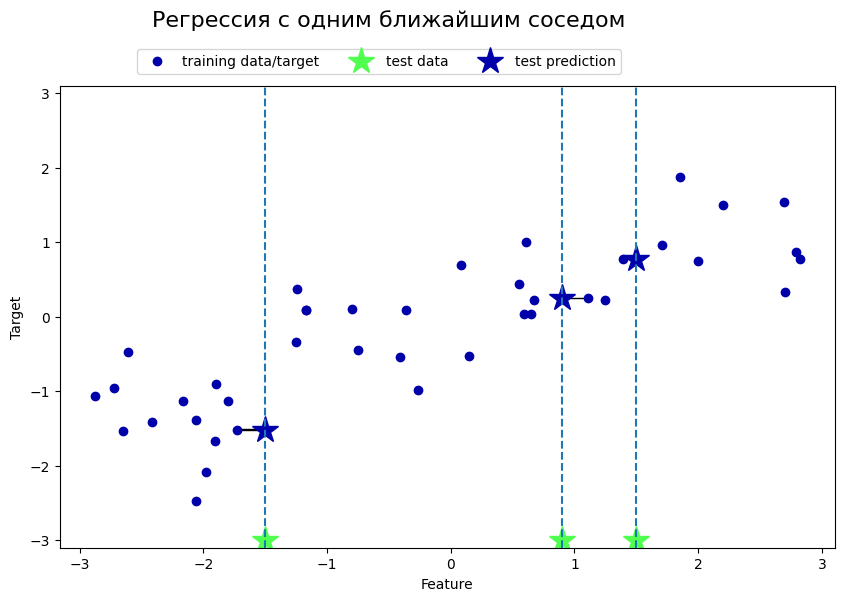

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.text(-0.5, 3.9, 'Регрессия с одним ближайшим соседом', ha='center', fontsize=16)
plt.show()

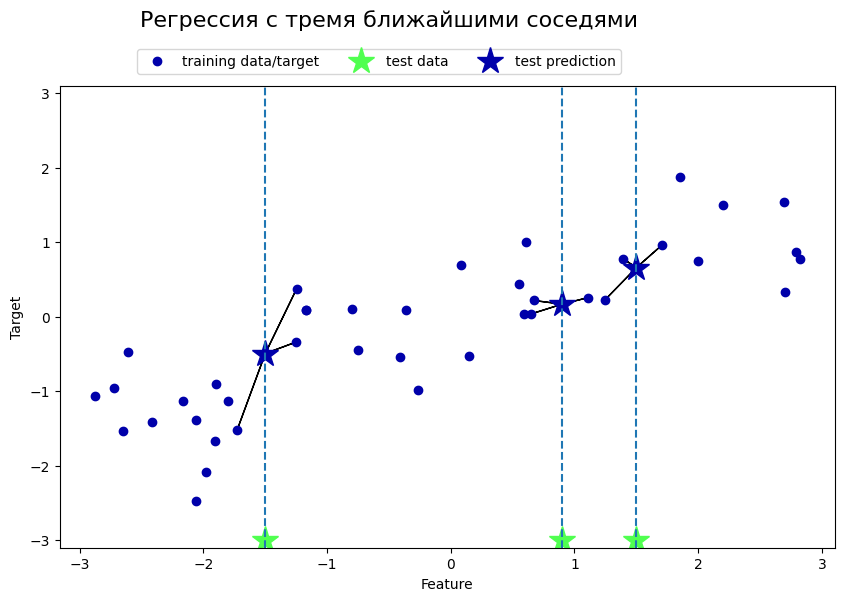

In [16]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.text(-0.5, 3.9, 'Регрессия с тремя ближайшими соседями', ha='center', fontsize=16)
plt.show()

#### KNN для классификации с помощью `scikit-learn`

Алгоритм регрессии *k ближайших соседей* реализован в классе `KNeighborsRegressor`. Он используется точно так же, как `KNeighborsClassifier`.

In [17]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print(f'Прогнозы для тестового набора:\n{np.round(reg.predict(X_test), 3)}')

Прогнозы для тестового набора:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


Оценим качество модели с помощью метода score, который для регрессионных моделей возвращает значение $R^2$.

$R^2$, также известный как коэффициент детерминации, является показателем качества регрессионной модели и принимает значения от 0 до 1.

In [18]:
print(f'R^2 на тестовом наборе: {reg.score(X_test, y_test):.2f}')

R^2 на тестовом наборе: 0.83


#### Анализ KNeighborsRegressor

Применительно к нашему одномерному массиву данных мы можем увидеть прогнозы для всех возможных значений признаков. Для этого мы создаем тестовый набор данных и визуализируем полученные линии прогнозов.

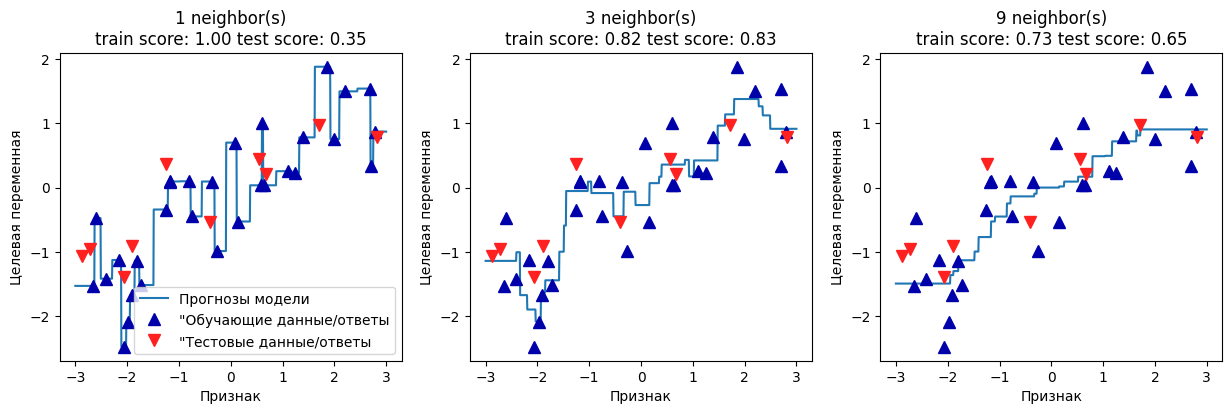

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test, y_test)
    ax.set_title(f'{n_neighbors} neighbor(s)\ntrain score: {train_score:.2f} test score: {test_score:.2f}')

    ax.set_xlabel('Признак')
    ax.set_ylabel('Целевая переменная')
axes[0].legend(['Прогнозы модели', '"Обучающие данные/ответы', '"Тестовые данные/ответы'], loc='best')
plt.show()

Как видно на графике, при использовании лишь одного соседа каждая точка обучающего набора имеет очевидное влияние на прогнозы, и предсказанные значения проходят через все точки данных. Это приводит к очень неустойчивым прогнозам. Увеличение числа соседей приводит к получению более сглаженных прогнозов, но при этом снижается правильность подгонки к обучающим данным